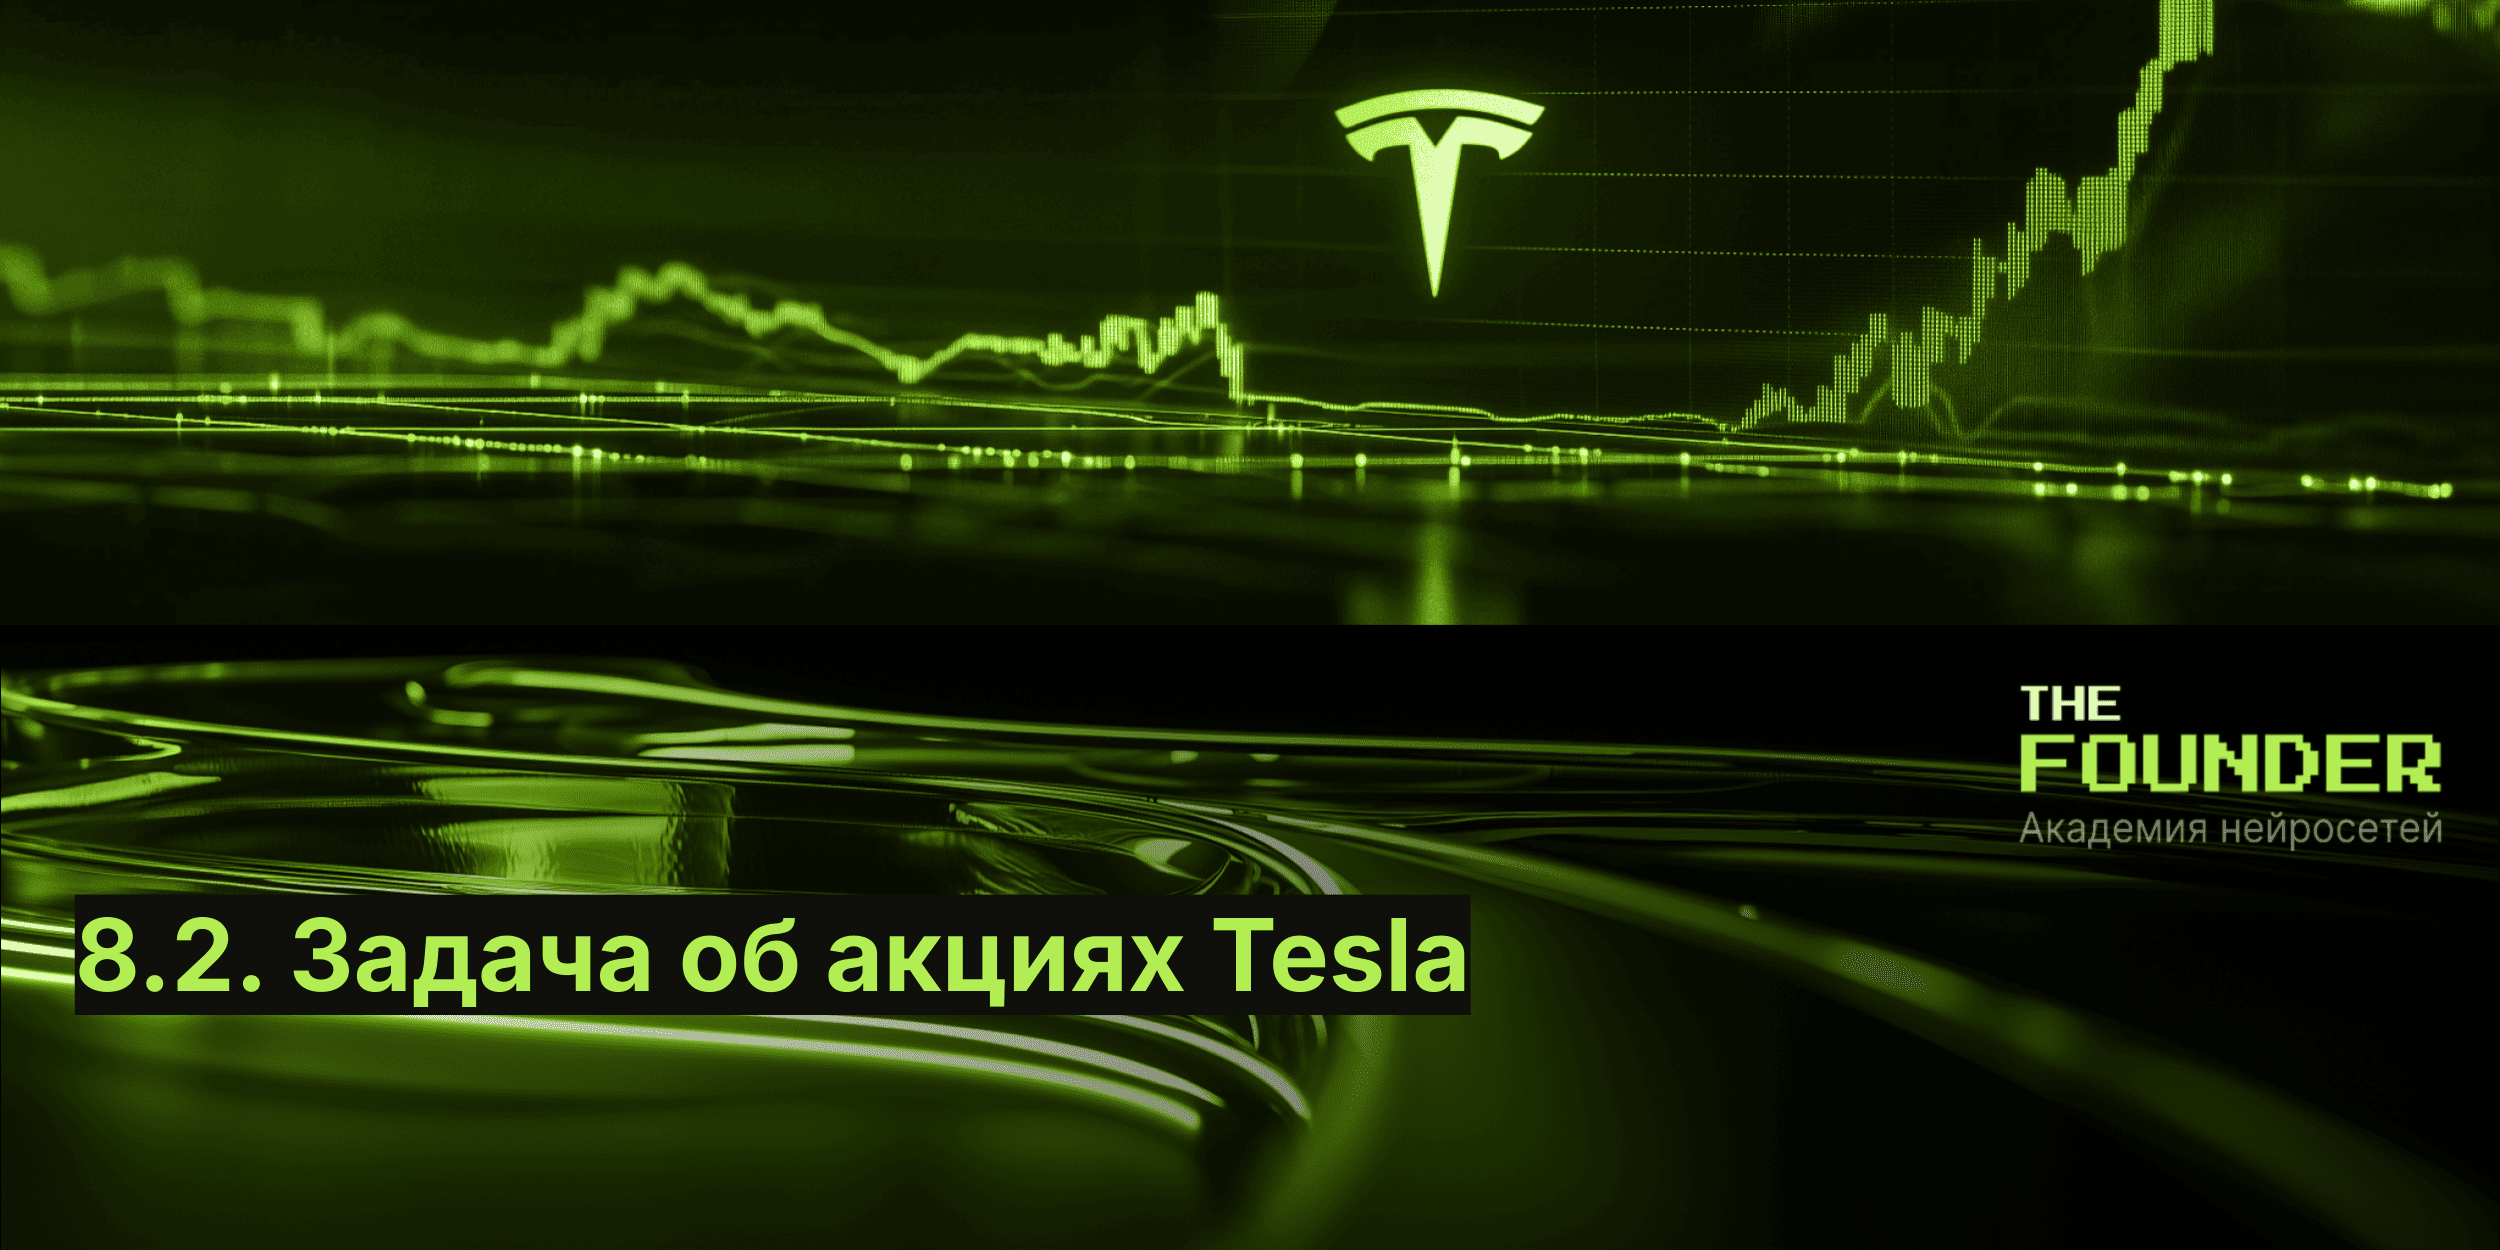

**Навигация по уроку**

1. [Библиотеки визуализации данных в Python](https://colab.research.google.com/drive/1IbLhzlqiJhhPAErmdQ9wuIUdDaSRlNUF)
2. [Задача об акциях Tesla](https://colab.research.google.com/drive/1q60S2H_UpzHlKByhQuTjaErsfZNpN7cl)
3. [Домашняя работа](https://colab.research.google.com/drive/1ZPDzV8gGLA9gHk3-i6lOFE8aeltErNKW)

В практической работе мы на примере биржевых цен на акции компании Tesla научимся визуализировать данные в библиотеке plotly. Для нашего примера мы используем набор данных о ценах на акции за период с 2010 по 2020 год. Набор данных содержит: дату, цену открытия, максимальное значение цены, минимальное значение цены, цены закрытия и объеме торгов.

Финансовые графики - отличный способ донести информацию о компании или финансовых рынках. А для нас это прекрасная возможность потренироваться в визуализации важнейшей для инвесторов информации.

Почему мы используем plotly вместо более распространенных matplotlib или seaborn?

* **Интерактивность.** По сравнению с другими библиотеками Python, plotly предоставляет гораздо больше интерактивности пользователю.
* **Простота.** Простой синтаксис, когда дело доходит до построения сложных финансовых графиков, особенно "свечей" (об этом чуть позже).
* **Эстетика.** Графики получаются значительно красивее.


In [ ]:
# Загрузим все необходимые библиотеки
import os
import numpy as np
import pandas as pd

import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

Мы будем показывать разные варианты загрузки данных из удаленных источников. В качестве первого примера - использование встроенной во все дистрибутивы GNU/Linux утилиты wget.

По состоянию на конец 2021 года:
> 96.3% серверов мира работают под управлением Linux. Только 1.9% используют Windows, а 1.8% - FreeBSD. При этом, по данным NetMarketShare, всего 1.84% всех персональных компьютеров, подключенных к Интернету, работали под управлением Linux.

Когда вы пишите сервис с нейронной сетью на борту, то фактически используете серверную среду, а значит работаете Linuх.

In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/TSLA.csv

--2023-11-10 12:40:11--  https://storage.yandexcloud.net/academy.ai/TSLA.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175082 (171K) [text/csv]
Saving to: ‘TSLA.csv’

TSLA.csv            100%[===================>] 170.98K   165KB/s    in 1.0s    

2023-11-10 12:40:14 (165 KB/s) - ‘TSLA.csv’ saved [175082/175082]



In [ ]:
df = pd.read_csv("./TSLA.csv") # wget скачал в рабочую директорию файл с датасетом и мы его уже можем использовать
# Дата должна быть в формате datetime для построения временных рядов
df['Date'] = pd.to_datetime(df['Date'])
df.index = range(len(df))

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
##########################

## Временные ряды

Начнем с временных рядов. Эти графики, по сути, представляют собой линейные графики, зависимые от времени и могут быть использованы для построения цен открытия, максимума, минимума и закрытия по отдельности. Чаще всего цена закрытия или максимума отображаются на графике, чтобы увидеть тренд движения акции.

In [ ]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Close'])])
fig.show()

Далее мы добавим "ползунок диапазона" (range slider) и селекторы (range selector) к нашим графикам. Ползунок диапазона или просто слайдер - это полоска под графиком, позволяющая управлять диапазоном дат по оси х для отображения на графике.
Примером селектора диапазона, в нашем случае, являются кнопки выбора диапазона - это специальные элементы управления, которые хорошо работают с временными рядами и ползунками диапазона и позволяют пользователям легко устанавливать диапазон по оси x, заранее заданным интервалам, например, месяц или год.

In [ ]:
fig = px.line(df, x='Date', y='High', title='Цена закрытия акций TSLA')

# Обновляем ось Х, добавляя в нее ползунок диапазона и кнопки выбора диапазона
fig.update_xaxes(rangeslider_visible=True, rangeselector=dict(
    buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
##########################

## Столбчатые диаграммы

При анализе биржевых данных столбчатые диаграммы обычно используются для визуализации объемов торгов:

In [ ]:
fig = go.Figure()
# Добавляем столбчатый график
fig.add_trace(go.Bar(x=df['Date'], y=df['Volume'], marker_color='blue')) # Каждый график с данными ассоциирован со своим трейсом (trace) в фигуре, таков концепт plotly
fig.update_xaxes(rangeslider_visible=True) # Обновляем ось Х, добавляя в нее ползунок диапазона

In [ ]:
##########################

## Графики свечей

Отображение динамики акций с помощью свечей - это устоявшая форма визуализации любой биржевой аналитики. Совершая сделки на финансовых рынках, будь то брокер, дилер, маклер, банкир или инвестор - первым делом изучит график свечей по интересуемой акции. И только потом примет решение о сделке.

По сути, это небольшие графические диаграммы, которые представляют открытие, максимум, закрытие и минимум акции на заданном временном интервале. Красная свеча - это медвежья свеча (цена закрытия < цена открытия), а зеленая свеча - бычья свеча (цена закрытия > цена открытия).

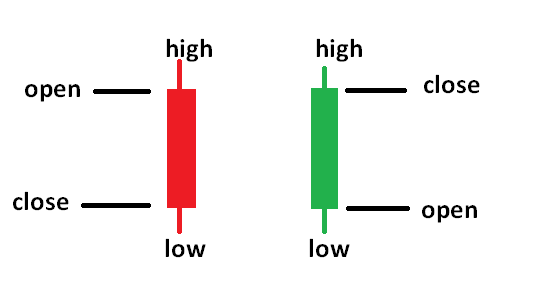

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

Также можно настроить цвета свечей в соответствии с вашей эстетикой и потребностями, используя параметры increasing_line_color и decreasing_line_color:

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                increasing_line_color='blue', decreasing_line_color='orange')])

fig.show()

In [ ]:
##########################

## OHLC графики

Подобно свечным графикам, вы также можете строить графики OHLC, которые, по сути, преследуют ту же цель - отображать открытие, максимум, минимум и закрытие акции, но только в другом виде. Кроме того, как и в matplotlib, у plotly есть функция make_subplots, в которой нужно указать количество строк и столбцов. Результатом работы этой функции будет таблица, в ячейках которой содержатся графики. Функцию можно использовать для объединения графиков вместе. Для примера объединим график OHLC с объемом сделок по акции:

In [ ]:
fig = make_subplots(rows=2, cols=1) # создаем фигуру и заданное количество осей

# Добавляем OHLC график к фигуре, задаем в какую строку row и колонку col будет вставлен график
fig.add_trace(go.Ohlc(x=df.Date, open=df.Open, high=df.High, low=df.Low, close=df.Close, name='Price'), row=1, col=1)
# Добавляем график по объемам (Volume) сделок к фигуре, задаем в какую строку row и колонку col будет вставлен график
fig.add_trace(go.Scatter(x=df.Date, y=df.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False) # Уберем ползунок диапазона
fig.show()

Новый трейс (график с привязкой к осям фигуры) может быть добавлен с помощью метода add_trace. Этот метод принимает графический объект и добавляет этот объект к фигуре. Можно также использовать метод append_trace, который не возвращает объект фигуры.

Как показано в примере выше, метод add_trace также принимает номер строки и столбца, если график нужно отрисовать в ячейке make_subplots.

Существует более удобный способ добавления графиков, точнее в терминологии plotly, трейсов. Вместо `add_trace`, можно указать `add_{тип_графика}`:

In [ ]:
fig = make_subplots(rows=2, cols=1) # создаем фигуру и заданное количество осей

# Добавляем OHLC график к фигуре
fig.add_ohlc(x=df.Date, open=df.Open, high=df.High, low=df.Low, close=df.Close, name='Price', row=1, col=1)
# Добавляем график по объемам (Volume) сделок к фигуре
fig.add_scatter(x=df.Date, y=df.Volume, name='Volume', row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False) # Уберем ползунок диапазона
fig.show()

In [ ]:
##########################

###  Аннотации на графиках

При построении аналитических графиков всегда на них хочется чего-нибудь показать, выделить, пометить. Для этого можно использовать функцию аннотации:


In [ ]:
fig = go.Figure(data=go.Ohlc(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close']))

fig.update_layout(
    title='Акции  Tesla',
    yaxis_title='Price',
    shapes = [dict(x0='2019-10-10', x1='2019-10-10', y0=0, y1=1, xref='x', yref='paper', line_width=2)],
    annotations=[dict(x='2019-10-10', y=0.05, xref='x', yref='paper', xanchor='right', text='Технологический прорыв')]
)

fig.show()

В примере выше `update_layout` добавляет на график прямую линию (через объект shapes) и текст (через объект anntations).

Для добавления прямой линии, мы добавляем к объектам shapes словарь со значениями двух точек, а именно, координаты (`x0`, `у0`) и (`х1`, `у1`), параметр толщины линии (line_width) в пикселях.

Что касается параметра `xref` (`yref`), то он задает ось координат `x` (`у`) фигуры. Если задан ID оси `x` (`у`), положение `x` (`у`) относится к координате `x` (`у`). Если установлено значение `paper`, положение `x` (`у`) относится к расстоянию слева от области построения в нормализованных координатах, где `0` (`1`) соответствует левому (правому) краю.

Для добавления текста, мы добавляем к объектам annotations словарь со значением позиции текста, а именно, координаты положения текста (`х`, `у`), сам текст (text).
Параметры `xref` (`yref`) имеют тот же смысл, что и для shapes.
Параметр `xanchor` устанавливает привязку горизонтального положения текстового поля. Эта привязка привязывает позицию `x` к левому (left), центральному (center) или правому (right) значению аннотации.
Например, если `x` установлен равным 1, `xref='paper'`, а `xanchor='right'`, то самая правая часть аннотации совпадает с самым правым краем области построения.

Более подробно про layout можно прочитать в официальной [документации](https://plotly.com/python/reference/layout/).

In [ ]:
##########################

## Инструменты технического анализа

Индикаторы - лучший способ визуализировать биржевую модель. Под моделью подразумевается система принятия финансовых решений, хорошо воспроизводимая на любых финансовых рынках (не зависит от тренда, временного диапазона, сезонных изменений и т.д). Хорошая финансовая модель должна быть воспроизводима!.

Обычно используют следующие наиболее распространенные индикаторы, на базе которых можно попробовать собрать простую биржевую модель:

1. Простая скользящая средняя (SMA). Среднее значение цены акции за определенный период времени. Например, за 5 дней.

2. Экспоненциальная скользящая средняя (EMA). Экспоненциальная скользящая средняя (EMA) - это тип скользящей средней (MA), который придает больший вес и значимость самым последним точкам данных, в основном это означает, что новые данные о ценах на акции имеют более высокий вес / значимость для цены, чем более старые данные.

3. Индекс относительной силы (RSI). Индикатор импульса, используемый в техническом анализе, который измеряет величину недавних изменений цен для оценки условий перекупленности или перепроданности в цене акции.

4. Конвергенция и расхождение скользящих средних (MACD). Индикатор импульса, следующий за трендом, который показывает взаимосвязь между двумя скользящими средними цены ценной бумаги. MACD рассчитывается путем вычитания 26-периодной экспоненциальной скользящей средней (EMA) из 12-периодной EMA. Подобно RSI, MACD подает технические сигналы, когда пересекает выше (для покупки) или ниже (для продажи) своей сигнальной линии.

Рассчитаем индикаторы:

In [ ]:
#SMA - расчет скользящих средних
df['SMA_5'] = df['Close'].rolling(5).mean().shift()
df['SMA_10'] = df['Close'].rolling(10).mean().shift()
df['SMA_15'] = df['Close'].rolling(15).mean().shift()
df['SMA_30'] = df['Close'].rolling(30).mean().shift()


#EMA - расчет экспоненциальной скользящей средней
df['EMA_9'] = df['Close'].ewm(9).mean().shift()
df['EMA_22'] = df['Close'].ewm(22).mean().shift()



#RSI14 - индекс относительной силы на 14 дней
def RSI(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

df['RSI'] = RSI(df).fillna(0)

EMA_12 = pd.Series(df['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(df['Close'].ewm(span=26, min_periods=26).mean())

# Расчет MACD и сигнала к сделке
df['MACD'] = pd.Series(EMA_12 - EMA_26)
df['MACD_signal'] = pd.Series(df.MACD.ewm(span=9, min_periods=9).mean())

In [ ]:
##########################

Построим на одном графике скользящие средние за 5, 10, 15 и 30 дней:

In [ ]:
fig = go.Figure()
fig.add_scatter(x=df.Date, y=df.SMA_5, name='SMA 5')
fig.add_scatter(x=df.Date, y=df.SMA_10, name='SMA 10')
fig.add_scatter(x=df.Date, y=df.SMA_15, name='SMA 15')
fig.add_scatter(x=df.Date, y=df.SMA_30, name='SMA 30')
fig.add_scatter(x=df.Date, y=df.Close, name='Close', opacity=0.3)
fig.update_xaxes(rangeslider_visible=True) # Обновляем ось Х, добавляя в нее ползунок диапазона
fig.show()

Построим экспоненциальные скользящие средние за 9 дней и 22 на одном графике с ценой закрытия:

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Date, y=df.EMA_9, name='EMA 9'))
fig.add_trace(go.Scatter(x=df.Date, y=df.EMA_22, name='EMA 22'))
fig.add_trace(go.Scatter(x=df.Date, y=df.Close, name='Close', opacity=0.3))
fig.update_xaxes(rangeslider_visible=True) # Обновляем ось Х, добавляя в нее ползунок диапазона
fig.show()

На основе EMA с разными периодами (периоды подбирают по рынку) трейдеры умудряются строить простые биржевые модели и торговые стратегии на их основе. Чтобы построить стратегия, достаточно проанализировать график:
1. Когда цена закрытия растет - EMA9 > EMA22 (так называемый "бычий тренд")
2. Когда цена закрытия падает - EMA9 < EMA22 (так называемый "медвежий тренд")
3. Пересечение EMA9 и EMA22 указывает на изменение тренда

В итоге мы получаем готовую торговую стратегию: когда EMA9 пересекает EMA22 снизу - сигнал к покупке, когда сверху - сигнал к продаже.

Аналогичный подход используется и для простых скользящих средних, а также их комбинаций.

In [ ]:
##########################

Построим график индекса относительной силы (RSI):

In [ ]:
fig = make_subplots(rows=3, cols=1) # создаем фигуру и заданное количество осей

fig.add_scatter(x=df.Date, y=df.Close, name='Close', row=1, col=1)
fig.add_scatter(x=df.Date, y=df.RSI, name='RSI', row=2, col=1)
# Добавляем график по объемам (Volume) сделок к фигуре
fig.add_scatter(x=df.Date, y=df.Volume, name='Volume', row=3, col=1)

fig.show()

Благодаря экспоненциальному методу усреднения и формуле расчета индикатора ценовые движения как бы проецируются на график со шкалой от 0 до 100, наглядно показывая истинную ценность каждого ценового изменения. Его обычно строят вместе с графиком объема сделок, что дает более детальную картину состояния рынка.

При этом направление изменения индикатора всегда совпадает с направлением изменения цены. Это и дает инвесторам возможность смотреть линии тренда, уровни поддержки и сопротивления не только на ценовом графике, но и на графике RSI. Такое дублирование помогает инвестору отсеять ложные сигналы в изменении тренда и не пропустить точные сигналы.

Если на графике RSI, например, наглядно определилась линия поддержки на уровне 65, то это значит, что мы имеем дело с устойчивым восходящим трендом, ведь даже при снижении цены соотношение движения вверх с движением вниз не опускается ниже отношения 65:35.

Индекс относительной силы может давать сигнал к покупке или продаже несколькими способами, которые можно сгруппировать так:

* **пересечение 50.** Пересечение индикатором уровня 50 означает, что преобладающим становится усредненное движение либо вверх, либо вниз. Такое пересечение может свидетельствовать о начале тренда. Если индикатор пересекает уровень 50 снизу вверх и показывает устойчивое превышение этого уровня, то можно говорить о восходящем тренде. Напротив, если индикатор пересекает уровень 50 сверху вниз и стабильно остается ниже этого уровня, то можно говорить о нисходящем тренде.
Таким образом, *пересечение индикатором RSI уровня 50 может служить сигналом к сделке. Если уровень 50 пересекается снизу вверх, то это сигнал покупки, а если сверху вниз — к продаже.*
* **дивергенция.** Это расхождение между ценой актива и графиком RSI. Дивергенция наблюдается, когда цена инструмента достигает новых максимумов или минимумов, а значение RSI при этом меньше или больше относительно предыдущих рекордов соответственно. Например, когда цена бьет рекорды, а значение RSI ниже предыдущего максимума — это пример «медвежьей» дивергенции. Появление «медвежьей» дивергенции говорит о возможном развороте цены от роста к снижению.
«Бычья» дивергенция наблюдается тогда, когда цена актива достигает новых минимумов, а RSI при этом выше предыдущих своих минимумов. Это может быть сигналом с развороту котировок от снижения к росту.
* **перекупленность и перепроданность.** Многие инвесторы считают, что значения индикатора выше 70 означают перекупленность инструмента, а ниже 30 — его перепроданность. Иными словами, те, кто придерживаются такой точки зрения, считают, что если RSI больше 70, то инструмент слишком дорог и скоро должны начаться продажи. Также, если RSI ниже 30, то это значит, что актив чрезмерно дешевый и должны начаться покупки.
* **линии тренда.** Формула расчета RSI гарантирует то, что колебания RSI всегда имеют то же направление, что и колебание цены. В силу этого на графике RSI можно рисовать линии тренда, уровни сопротивления, пересечение которых дает более точные и значительные сигналы, чем пересечение линий тренда, сопротивления или поддержки на ценовом графике.






In [ ]:
##########################

Построим график MACD и его сигнальной линии:

In [ ]:
fig = make_subplots(rows=2, cols=1)
fig.add_scatter(x=df.Date, y=df.Close, name='Close', row=1, col=1)
fig.add_scatter(x=df.Date, y=EMA_12, name='EMA 12', row=1, col=1)
fig.add_scatter(x=df.Date, y=EMA_26, name='EMA 26', row=1, col=1)
fig.add_scatter(x=df.Date, y=df['MACD'], name='MACD', row=2, col=1)
fig.add_scatter(x=df.Date, y=df['MACD_signal'], name='Signal line', row=2, col=1)
fig.show()

Сигнальная линия MACD представляет собой экспоненциальную скользящую среднюю основной линии MACD. Таким образом, пересечение основной линией сигнальной показывает изменение тренда основной линии.

Когда основная линия, находясь выше нулевого уровня, пересекает сигнальную линию сверху вниз, то можно говорить о возможном начале нисходящего тренда.

Наоборот, когда основная линия находится ниже нулевого уровня и пересекает сигнальную линию снизу вверх, это может означать начало восходящего тренда.

Таким образом, используя инструментарий Исследователя данных, вы можете анализировать финансовые рынки и строить торговые стратегии.

На этом практическая часть урока завершена. Пора переходить к [домашней работе](https://colab.research.google.com/drive/1ZPDzV8gGLA9gHk3-i6lOFE8aeltErNKW).